<a href="https://colab.research.google.com/github/fclubb/Earth-Surface-Processes/blob/master/Week1_SoilsAndWeathering/SoilProductionFunction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The soil production function
In this session you will explore a simple equation for how soil is produced on hillslopes over time. You will run this code in the Python computer programming language, but you don't need any prior knowledge of computer programming. The aims of this practical are:
* To become familiar with the Python programming language and Google Colaboratory
* Understand the soil production function and what the key parameters are
* Make some simple plots of how soil production varies with weathering rate
* Explore the difference between the exponential and humped soil production function.

### Python
The programming language we are using in this lab is called Python.  No prior knowledge of programming is required for this lab. Learning how to be a programmer is not the aim! However, this sort of scientific computing is becoming more common place in research and consultancy, so it won't do you any harm to see it in action. Python is multifunctional, for example it can interface with ArcGIS to automate workflows.

**To run a code block, click in a cell, hold down shift, and press enter.** An asterisk in square brackets `In [*]:` will appear while the code is being executed, and this will change to a number `[1]:` when the code is finished. *The order in which you execute the code blocks matters, they must be run in sequence.* 

### Working through the practical

To work through this notebook, firstly:
1. **COPY THE NOTEBOOK TO YOUR GOOGLE DRIVE** using the "Copy to Drive" button at the top of the page. 
2. Read through the instructions and execute each code block cell by clicking `Shift and Enter` to see what it does.
3. Do the exercise set out at the end of the notebook.
4. Save the figures and keep them for the next session.

### Let's get started...

Ok, let's get started with some Python! If you've never coded before, look at this notebook for a simple introduction: [Click here](https://colab.research.google.com/github/adamlamee/CODINGinK12/blob/master/notebooks/intro.ipynb)

Inside blocks of python code there are comments indicated by lines that start with `#`. These lines are not computer code but rather comments providing information about what the code is doing to help you follow along.

Python is a very easy programming language which has a lot of built in packages that can help us to do analyses. To access these helpful pieces of code, we first of all have to `import` them. To do this we just use the `import` command as shown below. The main ones are:

* `numpy`: a very useful package which allows us to do some important mathematical computations. See here for more details: https://numpy.org/
* `pandas`: this package allows us to load in CSV files to what are called _dataframes_: you can think of a dataframe as being similar to a spreadsheet, but a lot more efficient. https://pandas.pydata.org/docs/getting_started/overview.html
* `matplotlib`: we use this to make nice figures and plots. You can look at the matplotlib gallery for examples of plots you can make with it: https://matplotlib.org/3.1.1/gallery/index.html

Before we get started we need to tell python which packages we want to use (sometimes called modules):

In [40]:
# import modules for numerical calculations and for plotting
import numpy as np
import matplotlib.pyplot as plt

# tell python to allow plotting to occur within the page
%matplotlib inline

# Customise figure style
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Arial']})
rc('font',size=16)

# Couple of other things for displaying model progress
from ipywidgets import FloatProgress
from IPython.display import display
import os

## Hillslope Mass Conservation
In the lectures you have been considering the principle of mass conservation and how it can be applied to study and understand landscapes. In the case of hillslopes, mass conservation can be expressed as:

$$
\begin{equation}
{{dh}\over{dt}} = {{\rho_r}\over{\rho_s}} W + {{dq}\over{dx}}
\end{equation}
$$

This equation is tracking the change in soil thickness $h$ through time $t$ and depends on the local rate of new soil production by weathering $W$ and the divergence in hillslope sediment flux $q$ along the length of the hillslope (where $x$ denotes distance along the hillslope). Weathering rate is modified by the ratio of the bulk density of bedrock $\rho_r$ and dry soil $\rho_s$.

Next week you will explore how the hillslope mass balance equation can be implemented numerically and serve as an introduction to scientific computer programming. First, we will look at the various components of this equation to deepen understanding of how they will influence hillslope soils and hillslope morphology.

## Exponential Soil Production
Today we identified that the rate of weathering on a hillslope could be described as an exponential function that depends on soil depth, with weathering rates declining as soil gets deeper (Heimsath et al., 1997):

$$
\begin{equation}
W = W_0 e^{-kh}
\end{equation}
$$

Here, $W_0$ is the weathering rate when there is no soil cover and $k$ is an empirical constant that will depend on bedrock type, and the sorts of weathering processes operating on it. Typical values for $W_0$ are in the range 0.01-1 mm/yr [(Perron, 2017)](http://www.annualreviews.org/doi/abs/10.1146/annurev-earth-060614-105405). Note that when you're doing numerical calculations you have to be consistent with units. We will always do calculations in length units of ***metres*** (m), time units of ***years*** (y) and mass units of ***kilograms*** (kg). However we might convert to other units for the purposes of plotting sensible numbers (e.g. Weathering rates in mm/y = m/y $\times$ 1000).

Let's take a look at what this function looks like by plotting it with python:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


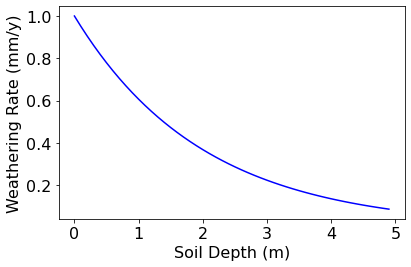

In [41]:
# define a range of soil thicknesses from 0-5m in 0.1m increments over which to evaluate the equation
h = np.arange(0.,5.,0.1)

# define the constants
W_0 = 0.001 # m/year
k = 0.5 # dimensionless

# execute the soil production equation, we have to use asterisk to times things together
W = W_0*np.exp(-k*h)

# set up a figure and set of axes for plotting
fig, ax = plt.subplots()

# make a line plot of h vs W (coloured blue)
# we'll convert W from m/year to mm/year by multiplying by 1000 since there are 1000 mm in a m
ax.plot(h,W*1000.,'b-')
plt.xlabel("Soil Depth (m)")
plt.ylabel("Weathering Rate (mm/y)")
plt.tight_layout()

Let's briefly explore how the constant values influence weathering rates. First we'll modify the $k$ parameter, feel free to choose your own value by changing the number in the code cell:

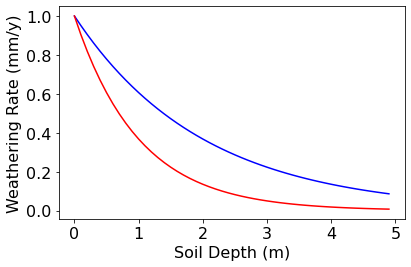

In [42]:
# k parameter has been modified here, you could choose your own value
k = 1.

# execute the soil production equation again with the new k
W2 = W_0*np.exp(-k*h)

# plot the new result with a red line
ax.plot(h,W2*1000.,'-', color='red')

# display the updated figure
fig

Now let's try changing the weathering rate when there is no soil present $W_0$:

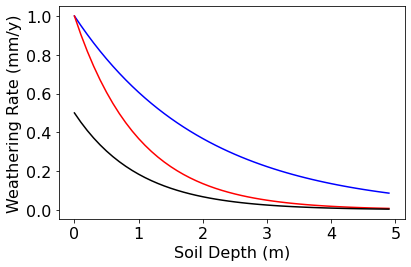

In [43]:
# modify W_0 parameter here
W_0 = 0.0005 #m/year

# execute the soil production equation again with the new W_0
W3 = W_0*np.exp(-k*h)

# plot the new result with a black line
ax.plot(h,W3*1000.,'-', color='black')

# display the updated figure
fig

We can save this graph to a file so that it can be used in a document or a report with the following command:

In [44]:
fig.savefig("Soil_Production_Plot.png", dpi=300) # dpi controls the resolution of the figure: increase it to get higher-quality figures

You might be wondering where the figures actually save. To find the figures, click on the small folder icon in the left hand toolbar: this opens your folder in Google Colaboratory. You should see the file `Soil_Production_Plot.png` that we just created:



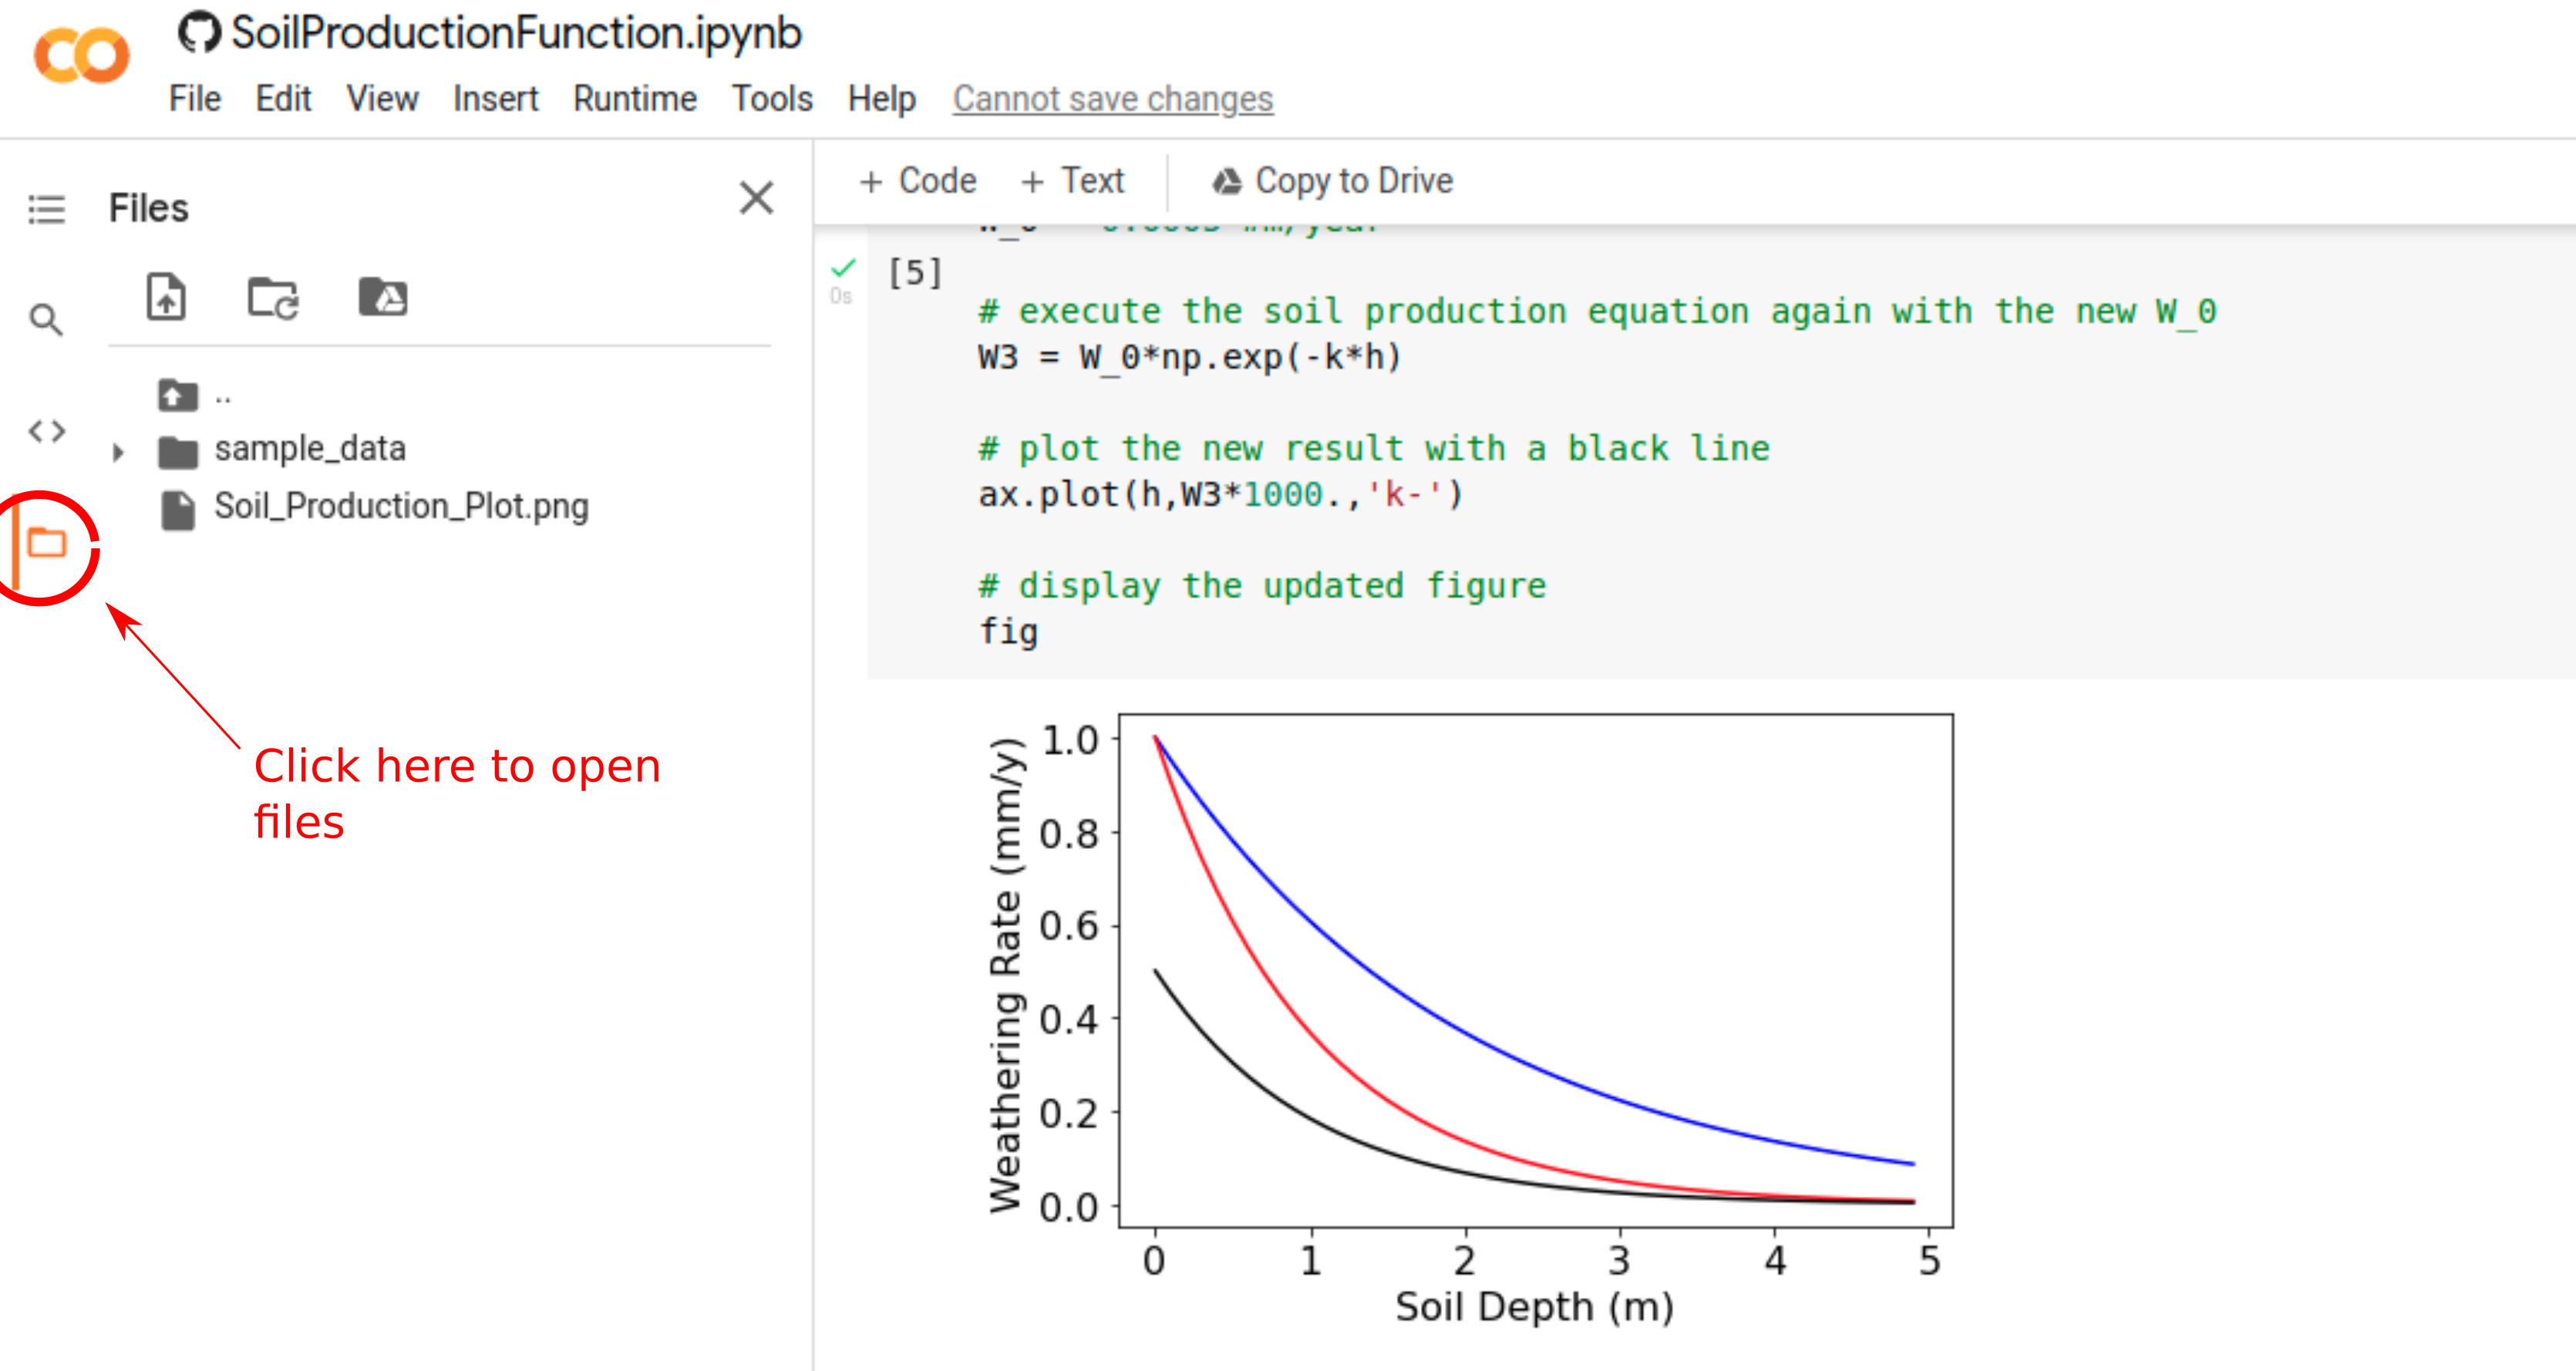

You can right click on the file we just created and click `Download` to save the figure to your local computer. Alternatively, you can connect Google Colaboratory to your Google Drive so that we can save figures in there automatically. To do that, run the code block below and follow the instructions to connect Google Drive:

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Once you have run this code, you should see a new folder in the `Files` bar appear called `drive` (you will probably have to refresh the folder before you see it). If you click on this you should be able to access your files in Google Drive.

## The peaked soil production function

We also discussed in the lecture an alternative way in which soil may be produced: where there are very slow rates of soil production where there is bare bedrock, then soil peaks at some intermediate thickness before decreasing exponentially with increasing soil thickness. This model dates back to Gilbert (1877), and makes intuitive sense: water is needed for weathering processes as we discussed today. If there is bare bedrock, water is quickly transported through overland flow and little weathering can take place. If there is too much soil, then it's unlikely to be fully saturated down to the bedrock--soil interface.

In this section, we will make some plots of a hypothetical peaked (or humped) soil production function.

We will use the theoretical formulation from [Cox (1980)](https://onlinelibrary.wiley.com/doi/abs/10.1002/esp.3760050305) to calculate the weathering rate for a range of soil depths. This is a bit more complicated than the exponential function and has a bigger range of parameters:

\begin{equation}
W = W_0 (\alpha e^{-kh}) + (1 - \alpha)f \\
f = \Bigg(1 + c\frac{h}{h_c} - \frac{h^2}{{h_c}^2}\Bigg)
\end{equation}

You should recognise some of these parameters from the exponential equation. The first part of the equation is the exponential function multiplied by a coefficient, $\alpha$. $W$ is still the weathering rate, $W_0$ is the inital rate of soil production where there is no soil, and $h$ is soil depth. There are two new parameters: $h_c$ is a critical soil depth (m), and $c$ is an empirical constant. Anhert (1977) suggests that $c$ might vary between 1.7 - 2.3, $h_c$ might vary between 0.6 - 1.5, and $\alpha$ between 0 - 1. If $\alpha = 1$, then the relationship is simply the exponential function.

<Figure size 432x288 with 0 Axes>

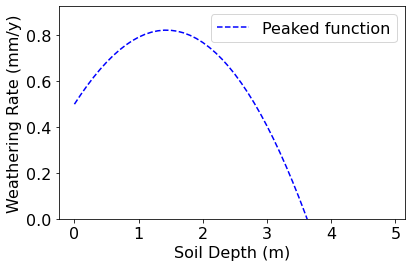

In [48]:
# first, let's clear the original figure
plt.clf()
# make a new figure
fig, ax = plt.subplots()

# define the critical depth for soil production
h_c = 1.5 #metres

# define the initial rate of soil production 
W_0 = 0.0005 #m/year

# define the constant c
c = 2 #dimensionless

# define alpha
alpha = 0.2

# calculate the weathering rate for the range of soil depths, h
f = (1 + c*(h/h_c) - h**2/h_c**2)
W = W_0 * (alpha * np.exp(-k*h) + (1 - alpha)*f)

# plot the new result with a blue dashed line
ax.plot(h,W*1000.,'--', color='blue', label = 'Peaked function')

# add a legend 
plt.legend(loc = 'upper right')

# set the y limit of the humped function to 0 (so we don't get negative weathering rates), and set the axis labels
ax.set_ylim(0,)
plt.xlabel("Soil Depth (m)")
plt.ylabel("Weathering Rate (mm/y)")
plt.tight_layout()

Exercise 1
---

1. Have a play around and try to change some of the parameters in the peaked function (simply modify in the code block above). How does this affect the curve?

2. Try to make a plot with the exponential and peaked functions on the same set of axes, so you can compare them (HINT - copy the line that creates the exponential soil production function into the code block above, and  then give it a different colour).

---


## Testing with some real data - will we have enough time to do this???

Now let's test our soil production functions on some real data! We're going to use a CSV file which has soil depth and soil production from the San Gabriel Mountains, as collected by Heimsath et al. (1997). We'll use the `pandas` package to read in the csv file, and then plot the data to compare to our hypothetical models. 

---
## Exercise 2
<p>Create a figure from the practical today that shows the difference between the peaked and exponential soil production functions for different initial soil production rates. You should write a figure caption that annotates what your soil production plot is showing. The caption should be a paragraph of text that describes each line, and the parameters that have been used to create them, and offers a brief explanation of how the parameters used influence rates of soil production. For an indication of the level of detail required, you could look at examples of captions to figures in journal articles, such as Figure 3 in  
[Heimsath et al. (2012)](https://www.nature.com/ngeo/journal/v5/n3/pdf/ngeo1380.pdf). You can use any program you like, such as Microsoft Word, to create your figure.

**Note**: the exercises from the practicals in this module will not be marked, but they are all teaching you important skills that will be used in the summative assessment. I would therefore really encourage you to engage with them. I will go over the answers and discuss the exercises at the start of the next session.

For your independent project, you will be expected to present 5 figures with captions, so this is a good chance to practice how to write a good figure caption!
